In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('mail_data.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


Category    0
Message     0
dtype: int64

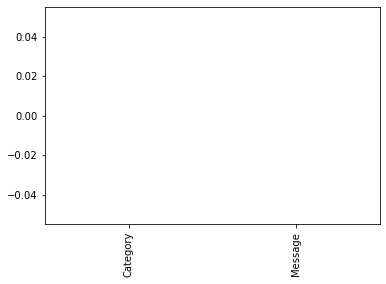

In [5]:
display(df.isna().sum())
df.isna().sum().plot(kind='bar');

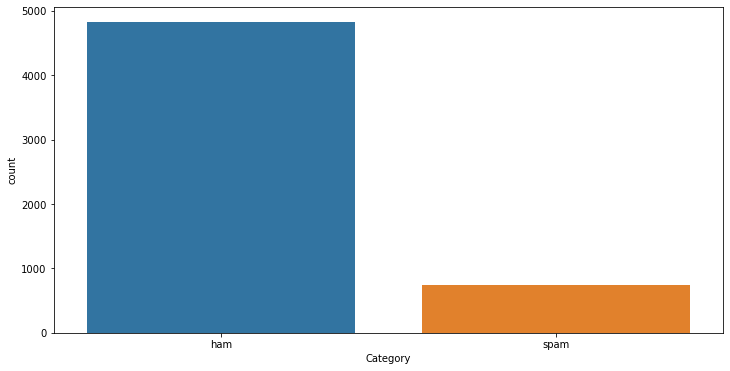

In [6]:
plt.figure(figsize = (12, 6))
sb.countplot(data = df, x = 'Category');

In [7]:
df.duplicated().sum()

415

In [8]:
df.shape

(5572, 2)

In [9]:
df.loc[df['Category']=='spam','Category'] = 0
df.loc[df['Category']== 'ham','Category'] = 1
df

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...
5568,1,Will ü b going to esplanade fr home?
5569,1,"Pity, * was in mood for that. So...any other s..."
5570,1,The guy did some bitching but I acted like i'd...


In [10]:
x = df['Message']
y = df['Category']

In [11]:
d= pd.get_dummies(df['Category'])
d

,0,1
0,0,1
1,0,1
2,1,0
3,0,1
4,0,1
...,...,...
5567,1,0
5568,0,1
5569,0,1
5570,0,1


In [12]:
df =pd.concat([df,d],axis=1)
df

,Category,Message,0,1
0,1,"Go until jurong point, crazy.. Available only ...",0,1
1,1,Ok lar... Joking wif u oni...,0,1
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,1,0
3,1,U dun say so early hor... U c already then say...,0,1
4,1,"Nah I don't think he goes to usf, he lives aro...",0,1
...,...,...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...,1,0
5568,1,Will ü b going to esplanade fr home?,0,1
5569,1,"Pity, * was in mood for that. So...any other s...",0,1
5570,1,The guy did some bitching but I acted like i'd...,0,1


In [13]:
df.drop(columns={'Category'},inplace=True)
df

,Message,0,1
0,"Go until jurong point, crazy.. Available only ...",0,1
1,Ok lar... Joking wif u oni...,0,1
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,0
3,U dun say so early hor... U c already then say...,0,1
4,"Nah I don't think he goes to usf, he lives aro...",0,1
...,...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1,0
5568,Will ü b going to esplanade fr home?,0,1
5569,"Pity, * was in mood for that. So...any other s...",0,1
5570,The guy did some bitching but I acted like i'd...,0,1


In [14]:
df.rename(columns={0:'spam'},inplace=True)
df.rename(columns={1:'ham'},inplace=True)
df

,Message,spam,ham
0,"Go until jurong point, crazy.. Available only ...",0,1
1,Ok lar... Joking wif u oni...,0,1
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,0
3,U dun say so early hor... U c already then say...,0,1
4,"Nah I don't think he goes to usf, he lives aro...",0,1
...,...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1,0
5568,Will ü b going to esplanade fr home?,0,1
5569,"Pity, * was in mood for that. So...any other s...",0,1
5570,The guy did some bitching but I acted like i'd...,0,1


In [15]:
print(x)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [16]:
print(y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
 x_train, x_test , y_train , y_test = train_test_split(x,y,test_size=0.3 , random_state=42)

In [19]:
print(x.shape)
print(x_train)
print(x_train.shape)
print(x_test.shape)

(5572,)
708     Quite late lar... Ard 12 anyway i wun b drivin...
4338                        on a Tuesday night r u 4 real
5029    Go chase after her and run her over while she'...
4921     G says you never answer your texts, confirm/deny
2592         Still work going on:)it is very small house.
                              ...                        
3772    Hi, wlcome back, did wonder if you got eaten b...
5191                               Sorry, I'll call later
5226        Prabha..i'm soryda..realy..frm heart i'm sory
5390                           Nt joking seriously i told
860               Did he just say somebody is named tampa
Name: Message, Length: 3900, dtype: object
(3900,)
(1672,)


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [21]:
feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase='True')
x_train_features = feature_extraction.fit_transform(x_train)
x_test_features = feature_extraction.transform(x_test)
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [22]:
print(x_train)

708     Quite late lar... Ard 12 anyway i wun b drivin...
4338                        on a Tuesday night r u 4 real
5029    Go chase after her and run her over while she'...
4921     G says you never answer your texts, confirm/deny
2592         Still work going on:)it is very small house.
                              ...                        
3772    Hi, wlcome back, did wonder if you got eaten b...
5191                               Sorry, I'll call later
5226        Prabha..i'm soryda..realy..frm heart i'm sory
5390                           Nt joking seriously i told
860               Did he just say somebody is named tampa
Name: Message, Length: 3900, dtype: object


In [23]:
print(x_train_features)

  (0, 2221)	0.4595576461719437
  (0, 6907)	0.42057032296489166
  (0, 260)	0.3977642008852706
  (0, 943)	0.35285068394560465
  (0, 3629)	0.33392519134134463
  (0, 3634)	0.31674844532481095
  (0, 5025)	0.3425956765507876
  (1, 5087)	0.564752315585174
  (1, 4329)	0.4556948018194525
  (1, 6399)	0.6880385669683886
  (2, 5909)	0.4598907748288949
  (2, 1882)	0.5577039025555312
  (2, 5320)	0.407962240134966
  (2, 1557)	0.5577039025555312
  (3, 2032)	0.5517950786382567
  (3, 1762)	0.4550182724182232
  (3, 6157)	0.39464721758363247
  (3, 889)	0.4179976347325351
  (3, 5392)	0.3975073759914889
  (4, 3168)	0.517613431846439
  (4, 5675)	0.6128580677760653
  (4, 2864)	0.40046755880208973
  (4, 6864)	0.44283976592107693
  (5, 6369)	0.3834923635990344
  (5, 5884)	0.4325022650654002
  :	:
  (3895, 6835)	0.4724310616139888
  (3895, 6851)	0.3960620484148489
  (3895, 2277)	0.4500945571447008
  (3895, 2080)	0.26990881063254835
  (3895, 2891)	0.2286724629283105
  (3895, 3085)	0.26272736081331977
  (3896, 575

In [24]:
model = LogisticRegression()

In [25]:
model.fit(x_train_features, y_train)

LogisticRegression()

In [26]:
prediction_on_training_data = model.predict(x_train_features)
accuracy_on_training_data = accuracy_score(y_train, prediction_on_training_data)

In [27]:
print('Accuracy on training data : ', accuracy_on_training_data)

Accuracy on training data :  0.963076923076923


In [28]:
prediction_on_test_data = model.predict(x_test_features)
accuracy_on_test_data = accuracy_score(y_test, prediction_on_test_data)

In [29]:
print('Accuracy on test data : ', accuracy_on_test_data)

Accuracy on test data :  0.9659090909090909


In [30]:
input_mail = ["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times"]
input_data_features = feature_extraction.transform(input_mail)
prediction = model.predict(input_data_features)
print(prediction)
if (prediction[0]==1):
  print('Ham mail')
else:
  print('Spam mail')

[1]
Ham mail


In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train, x_test , y_train , y_test = train_test_split(x,y,test_size=0.3 , random_state=42)

In [33]:
x_train.shape

(3900,)

In [34]:
x_test.shape

(1672,)

In [35]:
y_train.shape

(3900,)

In [36]:
y_test.shape

(1672,)

In [37]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()


In [38]:
import joblib
joblib.dump(s, 's.h5')

['s.h5']

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [40]:
m = { 'LR':LinearRegression(),
    'KNN':KNeighborsRegressor(),
    'DT':DecisionTreeRegressor(),
    'SVR':SVR(kernel='linear'),
    }

In [41]:
joblib.dump(m, 'm.h5')

['m.h5']

## 